In [70]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [71]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.910000e+12,46,Urban


In [72]:
#  1. Get the total rides for each city type
citytype_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
citytype_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [73]:
citytype_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
citytype_driver_count.head() 

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [74]:
citytype_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]
citytype_fare_count.head() 

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [75]:
citytype_avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
citytype_avg_fare.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [76]:
citytype_avg_driverfare = pyber_data_df.groupby(["type"]).sum()["fare"] / city_data_df.groupby(["type"]).sum()["driver_count"]
citytype_avg_driverfare.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [77]:
pyber_summary_df = pd.DataFrame({
    "Total Rides": citytype_ride_count,
    "Total Drivers": citytype_driver_count,
    "Total Fares": citytype_fare_count,
    "Average Fare per Ride": citytype_avg_fare,
    "Average Fare per Driver" : citytype_avg_driverfare
})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [78]:
pyber_summary_df.index.name = None
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [79]:
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [80]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [81]:
weekly_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]
weekly_fare_count.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [82]:
weekly_fare_count = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
weekly_fare_count.head()

date          type    
1/1/19 0:08   Urban       37.91
1/1/19 0:46   Suburban    47.74
1/1/19 12:32  Suburban    25.56
1/1/19 14:40  Urban        5.42
1/1/19 14:42  Urban       12.31
Name: fare, dtype: float64

In [83]:
 weekly_fare_count = weekly_fare_count.reset_index()

In [84]:
weekly_fare_count = weekly_fare_count.pivot(index="date", columns="type", values="fare")
weekly_fare_count.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
1/1/19 14:52,NaN,31.15,NaN
1/1/19 17:22,NaN,NaN,42.11
1/1/19 21:04,NaN,NaN,11.71
1/1/19 2:07,NaN,24.07,NaN


In [87]:
weekly_fare_count.index = pd.to_datetime(weekly_fare_count.index)

In [88]:
farecounts_Jan_Apr = weekly_fare_count.loc['2019-01-01':'2019-04-28']
farecounts_Jan_Apr

/var/folders/xx/16q7nkrj02z439w0f9wt9f780000gn/T/ipykernel_32322/260294698.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  farecounts_Jan_Apr = weekly_fare_count.loc['2019-01-01':'2019-04-28']


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-09 20:55:00,NaN,NaN,24.99
2019-04-09 21:41:00,NaN,NaN,15.96
2019-04-09 08:10:00,NaN,NaN,39.36


In [89]:
farecounts_Jan_Apr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [91]:
weekly_rides_df = farecounts_Jan_Apr.resample('W').sum()
weekly_rides_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


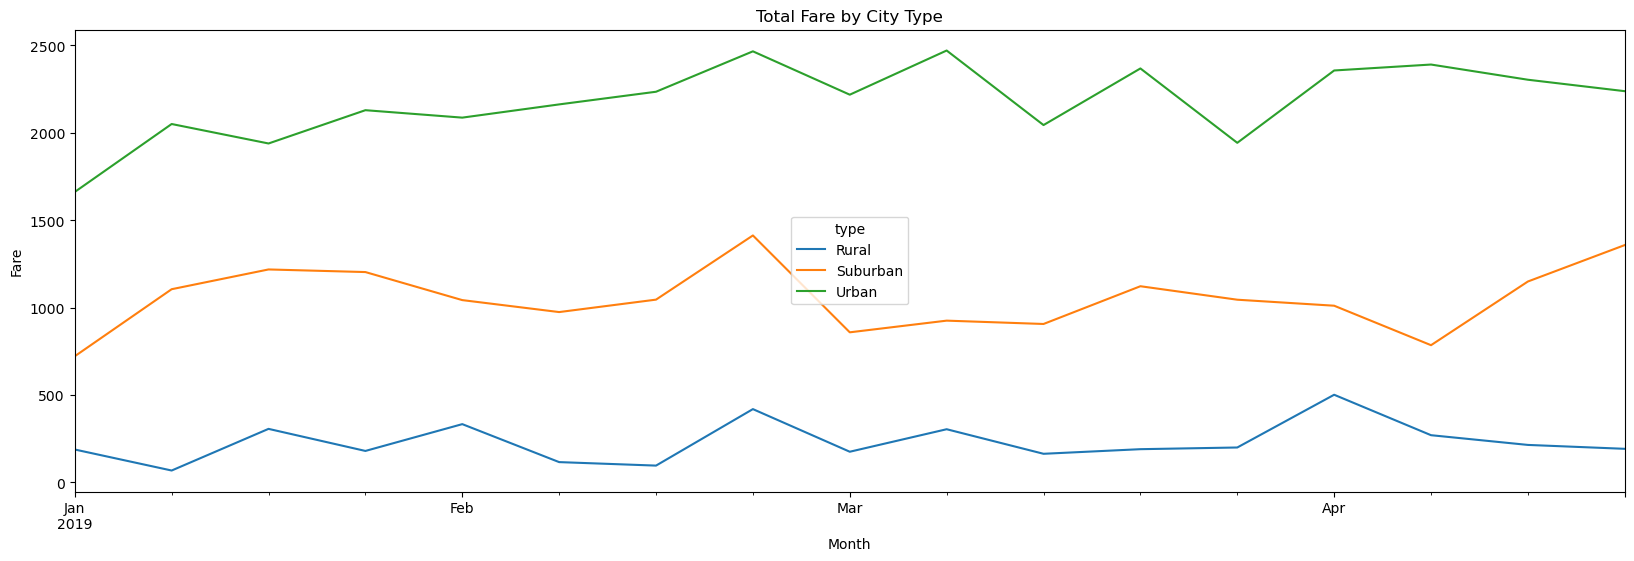

<Figure size 640x480 with 0 Axes>

In [92]:
# Plot the resampled DataFrame.

weekly_rides = weekly_rides_df.plot(figsize = (20,6))
# Add a title 
weekly_rides.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
weekly_rides.set_xlabel("Month")
weekly_rides.set_ylabel("Fare")

plt.show()
plt.tight_layout()